# Cleaning and Preparation

Use a single month's data set for cleaning and preparation.

These steps existing in `/scripts/cleaning.py` which are run against additional data sets to build the larger, 2018 data set.

In [1]:
# load pandas for data analysis
import pandas as pd

# load dataset
parking_violations = pd.read_csv('../data/sample/Parking_Violations_Issued_in_August_2018.csv')

In [2]:
# head of dataset
parking_violations.head()

,OBJECTID,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,PLATE_STATE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,290490,2018/08/24 04:00:00+00,01:44 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,...,NaN,1.0,NaN,NaN,399920.0,129047.0,38.829,-77.001,147401.0,2019/05/29 04:16:08+00
1,290491,2018/08/24 04:00:00+00,01:46 PM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,...,NaN,NaN,NaN,NaN,399920.0,129047.0,38.829,-77.001,147401.0,2019/05/29 04:16:08+00
2,290492,2018/08/24 04:00:00+00,02:20 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4329 4TH ST SE,,...,NaN,1.0,NaN,NaN,399867.0,128923.0,38.828,-77.002,147406.0,2019/05/29 04:16:08+00
3,290493,2018/08/24 04:00:00+00,02:25 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4221 4TH ST SE,,...,NaN,1.0,NaN,NaN,399923.0,128963.0,38.828,-77.001,147405.0,2019/05/29 04:16:08+00
4,290494,2018/08/24 04:00:00+00,03:20 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4337 4TH ST SE,,...,NaN,NaN,NaN,NaN,399860.0,128878.0,38.828,-77.002,147392.0,2019/05/29 04:16:08+00


In [3]:
# dataset info
parking_violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OBJECTID              136522 non-null  int64  
 1   ISSUE_DATE            136522 non-null  object 
 2   ISSUE_TIME            136436 non-null  object 
 3   ISSUING_AGENCY_CODE   136498 non-null  float64
 4   ISSUING_AGENCY_NAME   136498 non-null  object 
 5   ISSUING_AGENCY_SHORT  136498 non-null  object 
 6   VIOLATION_CODE        136522 non-null  object 
 7   VIOLATION_PROC_DESC   131860 non-null  object 
 8   LOCATION              136505 non-null  object 
 9   PLATE_STATE           136522 non-null  object 
 10  VEHICLE_TYPE          0 non-null       float64
 11  MULTI_OWNER_NUMBER    6660 non-null    float64
 12  DISPOSITION_CODE      57444 non-null   float64
 13  DISPOSITION_TYPE      136522 non-null  object 
 14  DISPOSITION_DESC      57444 non-null   object 
 15  

## Observations

Null fields:
* VEHICLE_TYPE
* PENALTY_1
* PENALTY_2
* PENALTY_3
* PENALTY_4
* PENALTY_5

Disposition fields - determine significance of DISPOSITION_CODE, DISPOSITION_TYPE, DISPOSITION_DESC, DISPOSITION_DATE
    
Date fields that require additional review:
* ISSUE_DATE - format
* GIS_LAST_MOD_DTTM - format, determine unique values and overall relevance
    

In [4]:
# drop null columns
parking_violations.drop(['VEHICLE_TYPE', 'PENALTY_1', 'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5'], axis=1, inplace=True)

In [5]:
# dispositions are dismissed tickets
# drop disposition columns
parking_violations.drop(['DISPOSITION_TYPE', 'DISPOSITION_DESC', 'DISPOSITION_DATE'], axis=1, inplace=True)

In [6]:
# review MULTI_OWNER_NUMBER and determine relevance
parking_violations['MULTI_OWNER_NUMBER'].unique()

array([           nan, 9.50251606e+08, 3.00830000e+07, ...,
       9.50152495e+08, 9.50361956e+08, 9.50334466e+08])

In [7]:
# MULTI_OWNER_NUMBER
parking_violations.drop('MULTI_OWNER_NUMBER', axis=1, inplace=True)

In [8]:
parking_violations['GIS_LAST_MOD_DTTM'].unique()

array(['2019/05/29 04:16:08+00', '2019/10/17 07:13:17+00',
       '2019/10/17 18:04:39+00'], dtype=object)

In [9]:
# column has a single value, drop it
parking_violations.drop('GIS_LAST_MOD_DTTM', axis=1, inplace=True)

In [10]:
# examine the relevance of license plates
parking_violations['PLATE_STATE'].unique()

array([' ', 'VA', 'MD'], dtype=object)

In [11]:
# license plates are limited
parking_violations.drop('PLATE_STATE', axis=1, inplace=True)

In [12]:
parking_violations.drop('VIOLATION_PROC_DESC', axis=1, inplace=True)

In [13]:
# drop redundant geo fields and the primary key
parking_violations.drop(['XCOORD', 'YCOORD', 'MAR_ID', 'OBJECTID'], axis=1, inplace=True)

In [14]:
# drop null time rows
parking_violations.dropna(subset=['ISSUE_TIME'], inplace=True)

In [15]:
# drop rows with nulls in meaningful dimensions
parking_violations.dropna(subset=['ISSUING_AGENCY_CODE', 'LATITUDE', 'LONGITUDE'], inplace=True)

In [16]:
# cast ISSUING_AGENCY_CODE to int
parking_violations['ISSUING_AGENCY_CODE'] = parking_violations['ISSUING_AGENCY_CODE'].astype('int')

In [17]:
# cast FINE_AMOUNT to int
parking_violations['FINE_AMOUNT'].fillna(0, inplace=True)
parking_violations['FINE_AMOUNT'] = parking_violations['FINE_AMOUNT'].astype('int')

In [18]:
# cast DISPOSITION_CODE to int
parking_violations['DISPOSITION_CODE'].fillna(0, inplace=True)
parking_violations['DISPOSITION_CODE'] = parking_violations['DISPOSITION_CODE'].astype('int')

In [19]:
# review updated data frame
parking_violations.head()

,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,LOCATION,DISPOSITION_CODE,FINE_AMOUNT,TOTAL_PAID,LATITUDE,LONGITUDE
0,2018/08/24 04:00:00+00,01:44 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4205 4TH ST SE,13,250,0,38.829,-77.001
1,2018/08/24 04:00:00+00,01:46 PM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4205 4TH ST SE,0,250,250,38.829,-77.001
2,2018/08/24 04:00:00+00,02:20 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4329 4TH ST SE,13,250,0,38.828,-77.002
3,2018/08/24 04:00:00+00,02:25 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4221 4TH ST SE,13,250,600,38.828,-77.001
4,2018/08/24 04:00:00+00,03:20 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4337 4TH ST SE,13,250,0,38.828,-77.002


In [20]:
parking_violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132231 entries, 0 to 136517
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ISSUE_DATE            132231 non-null  object 
 1   ISSUE_TIME            132231 non-null  object 
 2   ISSUING_AGENCY_CODE   132231 non-null  int64  
 3   ISSUING_AGENCY_NAME   132231 non-null  object 
 4   ISSUING_AGENCY_SHORT  132231 non-null  object 
 5   VIOLATION_CODE        132231 non-null  object 
 6   LOCATION              132231 non-null  object 
 7   DISPOSITION_CODE      132231 non-null  int64  
 8   FINE_AMOUNT           132231 non-null  int64  
 9   TOTAL_PAID            132231 non-null  int64  
 10  LATITUDE              132231 non-null  float64
 11  LONGITUDE             132231 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 13.1+ MB


## Feature Creation

In [21]:
# %load -r 1-9 ../scripts/utils.py
from dateutil.parser import parse


def format_date(date_str):
    return parse(date_str)


def format_time(time_str):
    return parse(time_str).time()

In [22]:
# convert ISSUE_DATE to a new date field
parking_violations['FORMAT_DATE'] = parking_violations.apply(lambda x: format_date(x['ISSUE_DATE']), axis=1)

In [23]:
# new column for day of month
parking_violations['DAY_OF_MONTH'] = parking_violations.apply(lambda x: x['FORMAT_DATE'].day, axis=1)

In [24]:
# new column for month
parking_violations['MONTH'] = parking_violations.apply(lambda x: x['FORMAT_DATE'].month, axis=1)

In [25]:
# convert ISSUE_DATE to a new date field
parking_violations['FORMAT_TIME'] = parking_violations.apply(lambda x: format_time(x['ISSUE_TIME']), axis=1)

In [26]:
# new column for hour in 24 hour format
parking_violations['HOUR'] = parking_violations.apply(lambda x: x['FORMAT_TIME'].hour, axis=1)

In [27]:
# custom column based upon the precense of a disposition, ie a rejected ticket
# this will be the target value
parking_violations['DISPOSITION_RESULT'] = parking_violations.apply(lambda x: 1 if (x['DISPOSITION_CODE'] > 0) else 0, axis=1)

In [28]:
# review updated data frame
parking_violations.head(10)

,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,LOCATION,DISPOSITION_CODE,FINE_AMOUNT,TOTAL_PAID,LATITUDE,LONGITUDE,FORMAT_DATE,DAY_OF_MONTH,MONTH,FORMAT_TIME,HOUR,DISPOSITION_RESULT
0,2018/08/24 04:00:00+00,01:44 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4205 4TH ST SE,13,250,0,38.829,-77.001,2018-08-24 04:00:00+00:00,24,8,01:44:00,1,1
1,2018/08/24 04:00:00+00,01:46 PM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4205 4TH ST SE,0,250,250,38.829,-77.001,2018-08-24 04:00:00+00:00,24,8,13:46:00,13,0
2,2018/08/24 04:00:00+00,02:20 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4329 4TH ST SE,13,250,0,38.828,-77.002,2018-08-24 04:00:00+00:00,24,8,02:20:00,2,1
3,2018/08/24 04:00:00+00,02:25 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4221 4TH ST SE,13,250,600,38.828,-77.001,2018-08-24 04:00:00+00:00,24,8,02:25:00,2,1
4,2018/08/24 04:00:00+00,03:20 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4337 4TH ST SE,13,250,0,38.828,-77.002,2018-08-24 04:00:00+00:00,24,8,03:20:00,3,1
5,2018/08/24 04:00:00+00,03:21 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,4349 4TH ST SE,108,250,50,38.827,-77.001,2018-08-24 04:00:00+00:00,24,8,03:21:00,3,1
7,2018/08/09 04:00:00+00,07:09 AM,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,P014,600 F ST NW,106,50,0,38.897,-77.020,2018-08-09 04:00:00+00:00,9,8,07:09:00,7,1
8,2018/08/09 04:00:00+00,07:11 AM,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,P014,700 F ST NW,106,50,0,38.897,-77.022,2018-08-09 04:00:00+00:00,9,8,07:11:00,7,1
9,2018/08/09 04:00:00+00,07:13 AM,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,P014,700 F ST NW,0,0,0,38.897,-77.022,2018-08-09 04:00:00+00:00,9,8,07:13:00,7,0
14,2018/08/26 04:00:00+00,08:55 AM,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P170,1200 BLK D ST SW,0,100,100,38.885,-77.029,2018-08-26 04:00:00+00:00,26,8,08:55:00,8,0


In [29]:
parking_violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132231 entries, 0 to 136517
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype                  
---  ------                --------------   -----                  
 0   ISSUE_DATE            132231 non-null  object                 
 1   ISSUE_TIME            132231 non-null  object                 
 2   ISSUING_AGENCY_CODE   132231 non-null  int64                  
 3   ISSUING_AGENCY_NAME   132231 non-null  object                 
 4   ISSUING_AGENCY_SHORT  132231 non-null  object                 
 5   VIOLATION_CODE        132231 non-null  object                 
 6   LOCATION              132231 non-null  object                 
 7   DISPOSITION_CODE      132231 non-null  int64                  
 8   FINE_AMOUNT           132231 non-null  int64                  
 9   TOTAL_PAID            132231 non-null  int64                  
 10  LATITUDE              132231 non-null  float64                
 11  

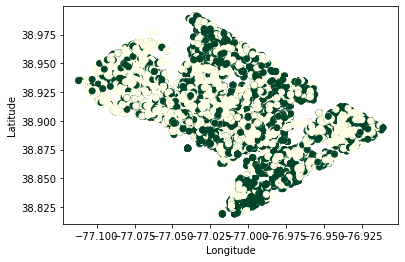

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y=parking_violations['LATITUDE'], x=parking_violations['LONGITUDE'], c=parking_violations['DISPOSITION_RESULT'], cmap='YlGn')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()